<a href="https://colab.research.google.com/github/88FaHaD/ML/blob/main/regressionwithevealuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression evaluation matrics
* Mean absolute error:-it calculates the average of how wrong the models prediction are

* Mean square error :- it calculates the square of the average error

* Huber :- it is the cobinaation of mse and  mae

* we use mae for small errors a and mse for large errors


In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

#Makiing the dataset

In [19]:
x=tf.range(-100,100,4)

y=x+10

# Spliting the dataset
for training and test

In [20]:
x_train=x[:40]
x_test=x[40:]

y_train=y[:40]
y_test=y[40:]


# Building the neural network model

In [101]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_shape=[1], name='Input_layer'),

    tf.keras.layers.Dense(1, name='Output_layer')
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics=['mae'])

model.fit(x_train,y_train,epochs=1000,verbose=0)

# Plotig the model


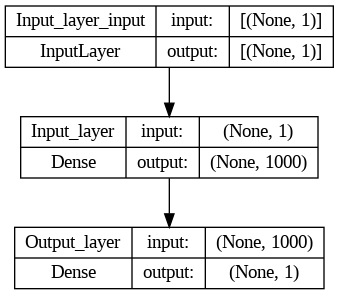

In [102]:
plot_model(model=model,show_shapes=True)

#predictios

In [103]:
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 41ms/step


#creating a Ploting fuction


In [104]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10,7))
    # Training data
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    # Test data
    plt.scatter(test_data, test_labels, c='g', label='Test data')
    # Predictions
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()
    plt.show()

# CallIng the prediction function

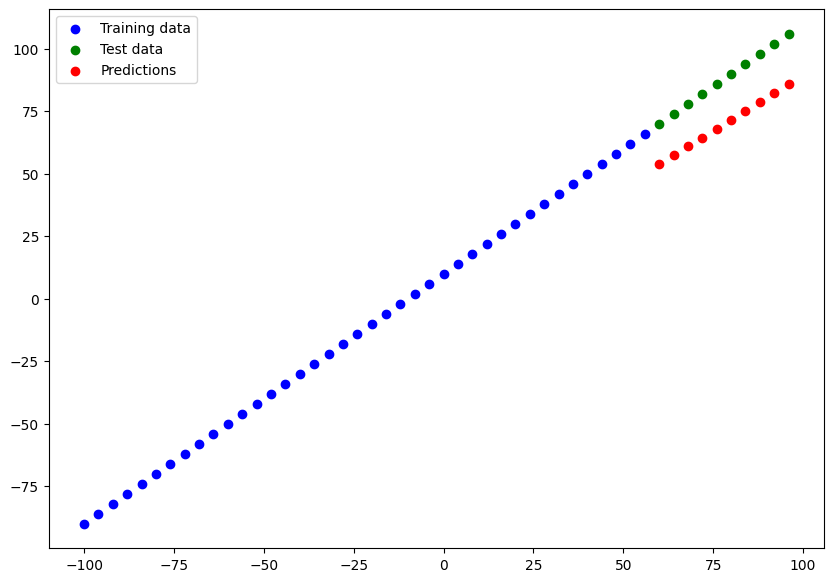

In [105]:
plot_predictions()


# Evaluate


In [106]:
model.evaluate(x_test,y_test)


1/1 [==============================] - 0s 100ms/step - loss: 18.1999 - mae: 18.1999


[18.199935913085938, 18.199935913085938]

# compare the shape of y_pred and y_test before evaluating

IF THEY ARE NOT SAME CHANGE IT

In [107]:
y_pred

array([[53.801113],
       [57.356438],
       [60.91176 ],
       [64.46708 ],
       [68.02241 ],
       [71.57772 ],
       [75.13305 ],
       [78.68836 ],
       [82.24369 ],
       [85.79901 ]], dtype=float32)

In [108]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

#calculating the mae

In [109]:
#convert y_pred to tensor and then change the shape
y_pred=tf.constant(y_pred)
y_pred=tf.squeeze(y_pred)
#calculating the mae
mae=tf.keras.losses.MAE(y_test,y_pred)
print('mean absolute error is ',mae)

mean absolute error is  tf.Tensor(18.199936, shape=(), dtype=float32)


# calculating the MSE

In [110]:
mse=tf.keras.losses.MSE(y_test,y_pred)
print('mean square error is ', mse)

mean square error is  tf.Tensor(332.86905, shape=(), dtype=float32)


# Improving the model with more expirmets

* Get more data

* Create more Hidden layers

* Train on more epochs

In [127]:
# rebuilding the model

newmodel = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name='inputlayer'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1, name='output')
])


newmodel.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics=['mae'])

newmodel.fit(x_test,y_test,epochs=1000,verbose=0)

# Doing prediction with the new model



In [128]:
y_pred2=newmodel.predict(x_test)


1/1 [==============================] - 0s 55ms/step


#Ploting the new model

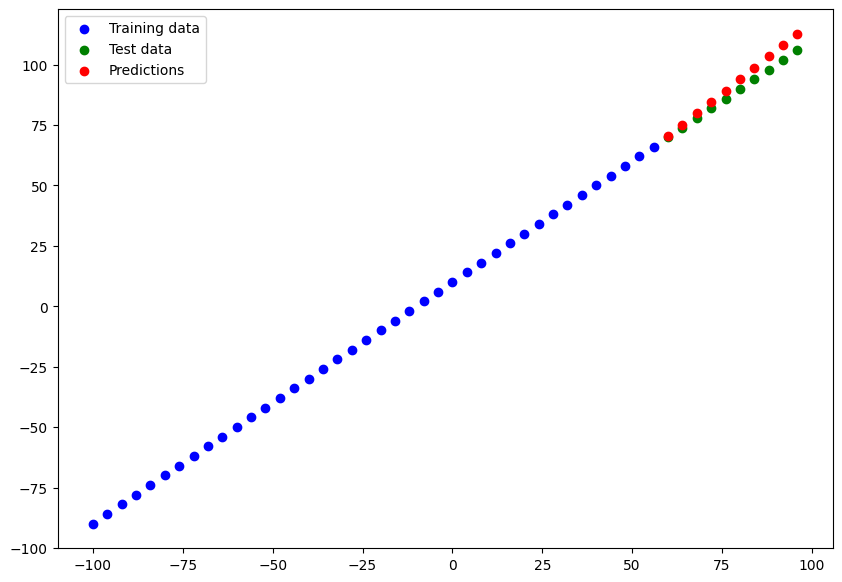

In [129]:
plot_predictions(predictions=y_pred1) # only change predictuion others are same

# Calculating new mse and mae

In [130]:
y_pred2=tf.constant(y_pred2)# converting to tensor
y_pred2=tf.squeeze(y_pred2)# change the shape

new_mae=tf.keras.losses.MAE(y_test,y_pred2)
print('MAE for improved model is ', new_mae)

print()
print()

new_mse=tf.keras.losses.MSE(y_test,y_pred2)
print('MSE for improved model is ', new_mse)



MAE for improved model is  tf.Tensor(1.9077301, shape=(), dtype=float32)


MSE for improved model is  tf.Tensor(5.0553436, shape=(), dtype=float32)


# comparing the models


In [133]:
import pandas as pd
model_results=[[model,mae.numpy(),mse.numpy()],
              [newmodel,new_mae.numpy(),new_mse.numpy()]
]

all_results=pd.DataFrame(model_results,columns=['models','mae','mse'])

all_results

,models,mae,mse
0,<keras.src.engine.sequential.Sequential object...,18.199936,332.869049
1,<keras.src.engine.sequential.Sequential object...,1.907730,5.055344
